In [50]:
import matplotlib as mpl
import numpy as np
import scipy 
import pickle
import pylab as plt
import copy
%matplotlib inline

In [51]:
f=open("./MCEqFluxMeshes.pkl","rb")
EBins, cosas, bs, FluxMeshes= pickle.load(f)
f.close()

f=open("./LinInterps.pkl","rb")
LinInterps=pickle.load(f)
f.close()

In [52]:
LinInterps.keys()

dict_keys([100, 300, 400, 450, 500, 550, 600, 650, 700, 800, 900, 1000, 2000, 4000, 6000])

In [53]:
eps=0.01
survivalfractions=[]
correctedmeshes=[]
for ei in range(0,len(EBins)-2):
    mesh=copy.copy(FluxMeshes[ei])
    survmesh=np.zeros_like(mesh)
    for ica in range(len(cosas)):
        for ib in range(len(bs)):
            surv=LinInterps[EBins[ei]](cosas[ica]+eps,bs[ib])
            survmesh[ica,ib]=surv
            mesh[ica,ib]=mesh[ica,ib]*surv
    correctedmeshes.append(mesh)
    survivalfractions.append(survmesh)


Text(0, 0.5, '$\\beta$')

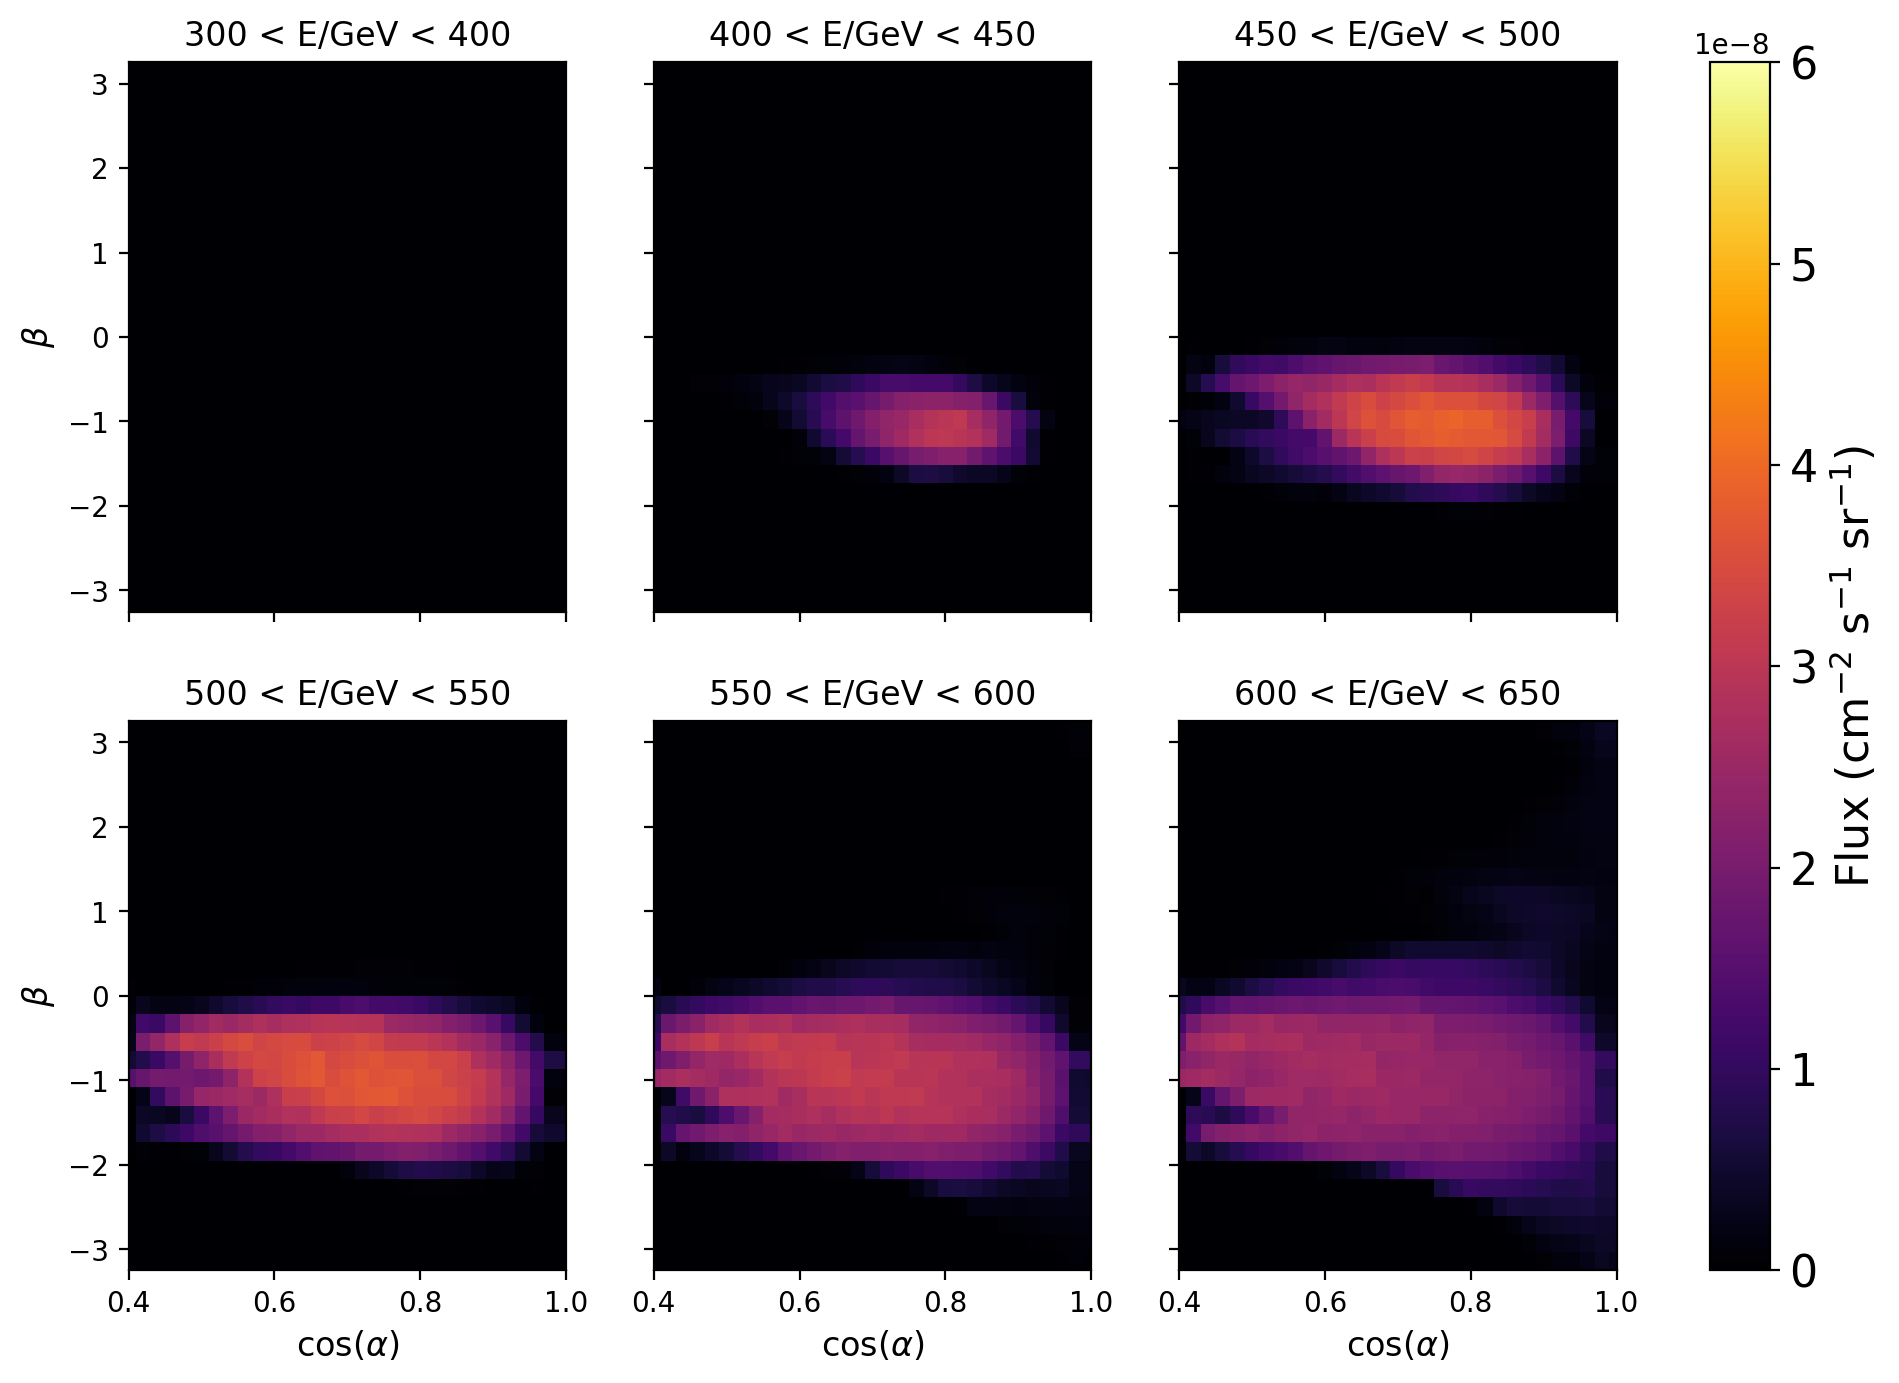

In [54]:
startn=1
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200, sharex=True, sharey=True)
for iax in range(0,len(axes.flat)):
    ax=axes.flatten()[iax]
    im=ax.pcolormesh(cosas,bs,np.transpose(correctedmeshes[iax+startn]),cmap='inferno',shading='auto',vmin=0,vmax=6e-8)
    ax.set_title(str(EBins[iax+startn])+ " < E/GeV < " + str(EBins[iax+startn+1]))
    ax.set_xlim(0.4,1)
cbar=fig.colorbar(im, ax=axes.ravel().tolist(),label='Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)
cbar.ax.tick_params(labelsize=16)

axes[1,0].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,1].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,2].set_xlabel(r"cos($\alpha$)",fontsize=12)

axes[1,0].set_ylabel(r"$\beta$",fontsize=12)
axes[0,0].set_ylabel(r"$\beta$",fontsize=12)



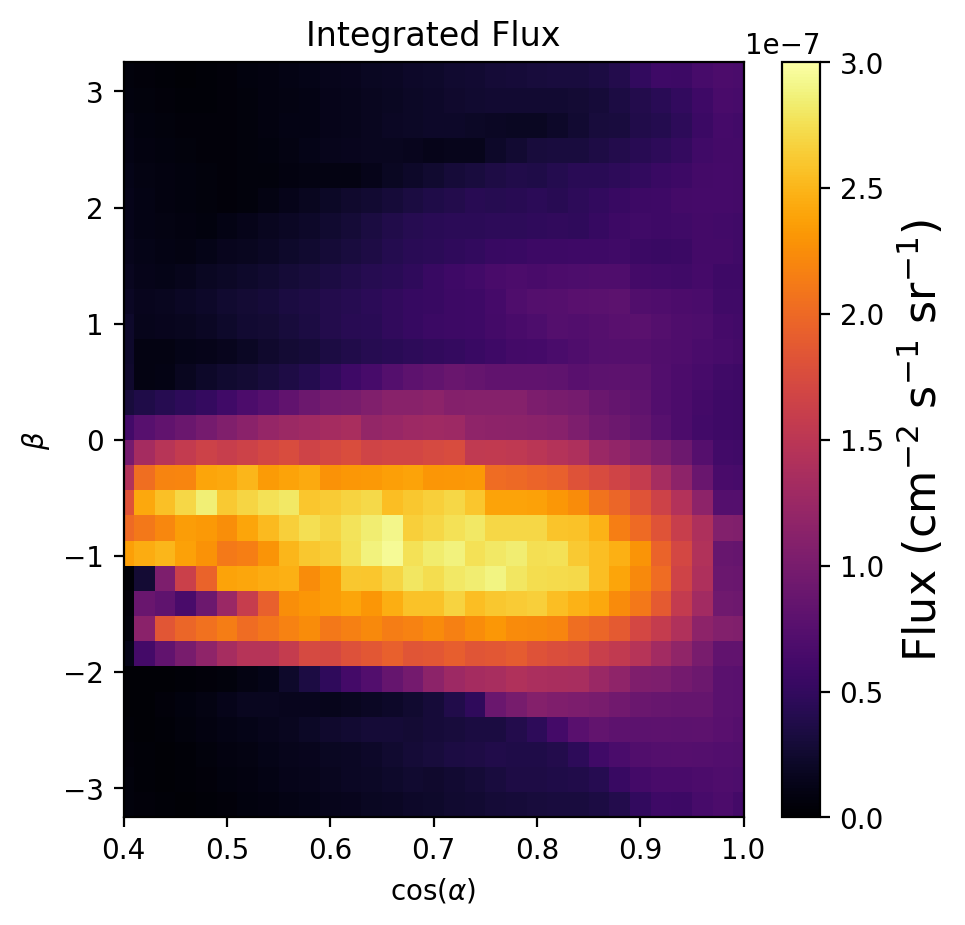

In [55]:
plt.figure(figsize=(5,5),dpi=200)
totalflux=np.zeros_like(correctedmeshes[0])
for m in correctedmeshes:
    totalflux+=m
im=plt.pcolormesh(cosas,bs,np.transpose(totalflux),cmap='inferno',shading='auto',vmin=0,vmax=3e-7)
ax.set_title("Integrated")

plt.xlabel(r"cos($\alpha$)")
plt.ylabel(r"$\beta$")
plt.xlim(0.4,1)
plt.title("Integrated Flux")
cbar=plt.colorbar()
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)



(0.0, 5e-06)

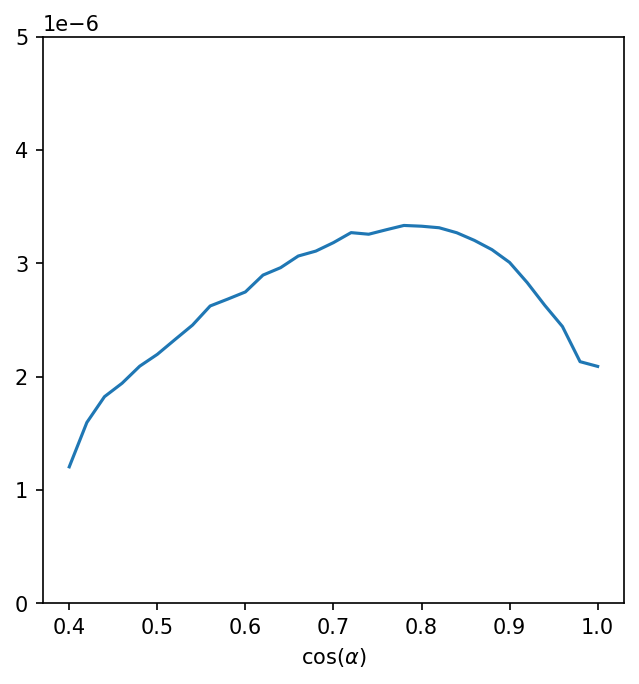

In [73]:
plt.figure(figsize=(5,5),dpi=150)
plt.plot(cosas,[sum(t) for t in totalflux])
plt.xlabel(r"cos($\alpha$)")
plt.ylim(0,5e-6)

Text(0.5, 0, '$\\beta$')

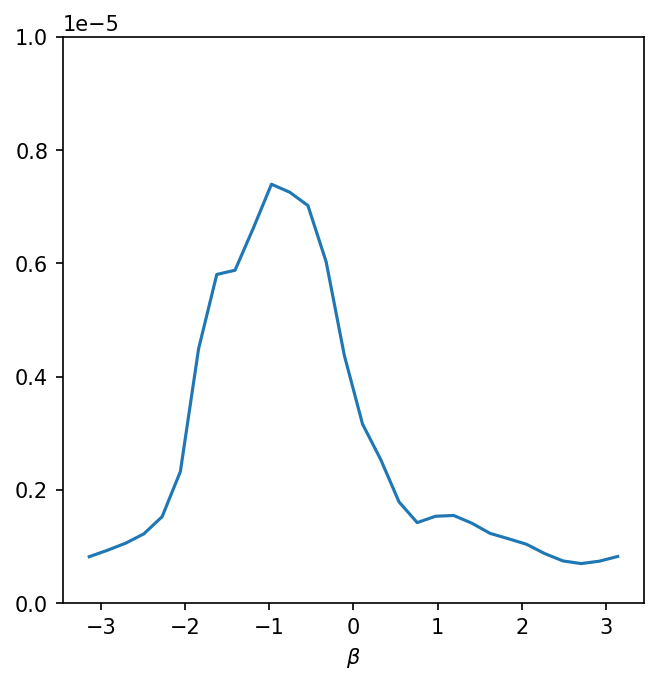

In [72]:
plt.figure(figsize=(5,5),dpi=150)

plt.ylim(0,1e-5)
plt.plot(bs,sum(totalflux))
plt.xlabel(r"$\beta$")


Text(0, 0.5, '$\\beta$')

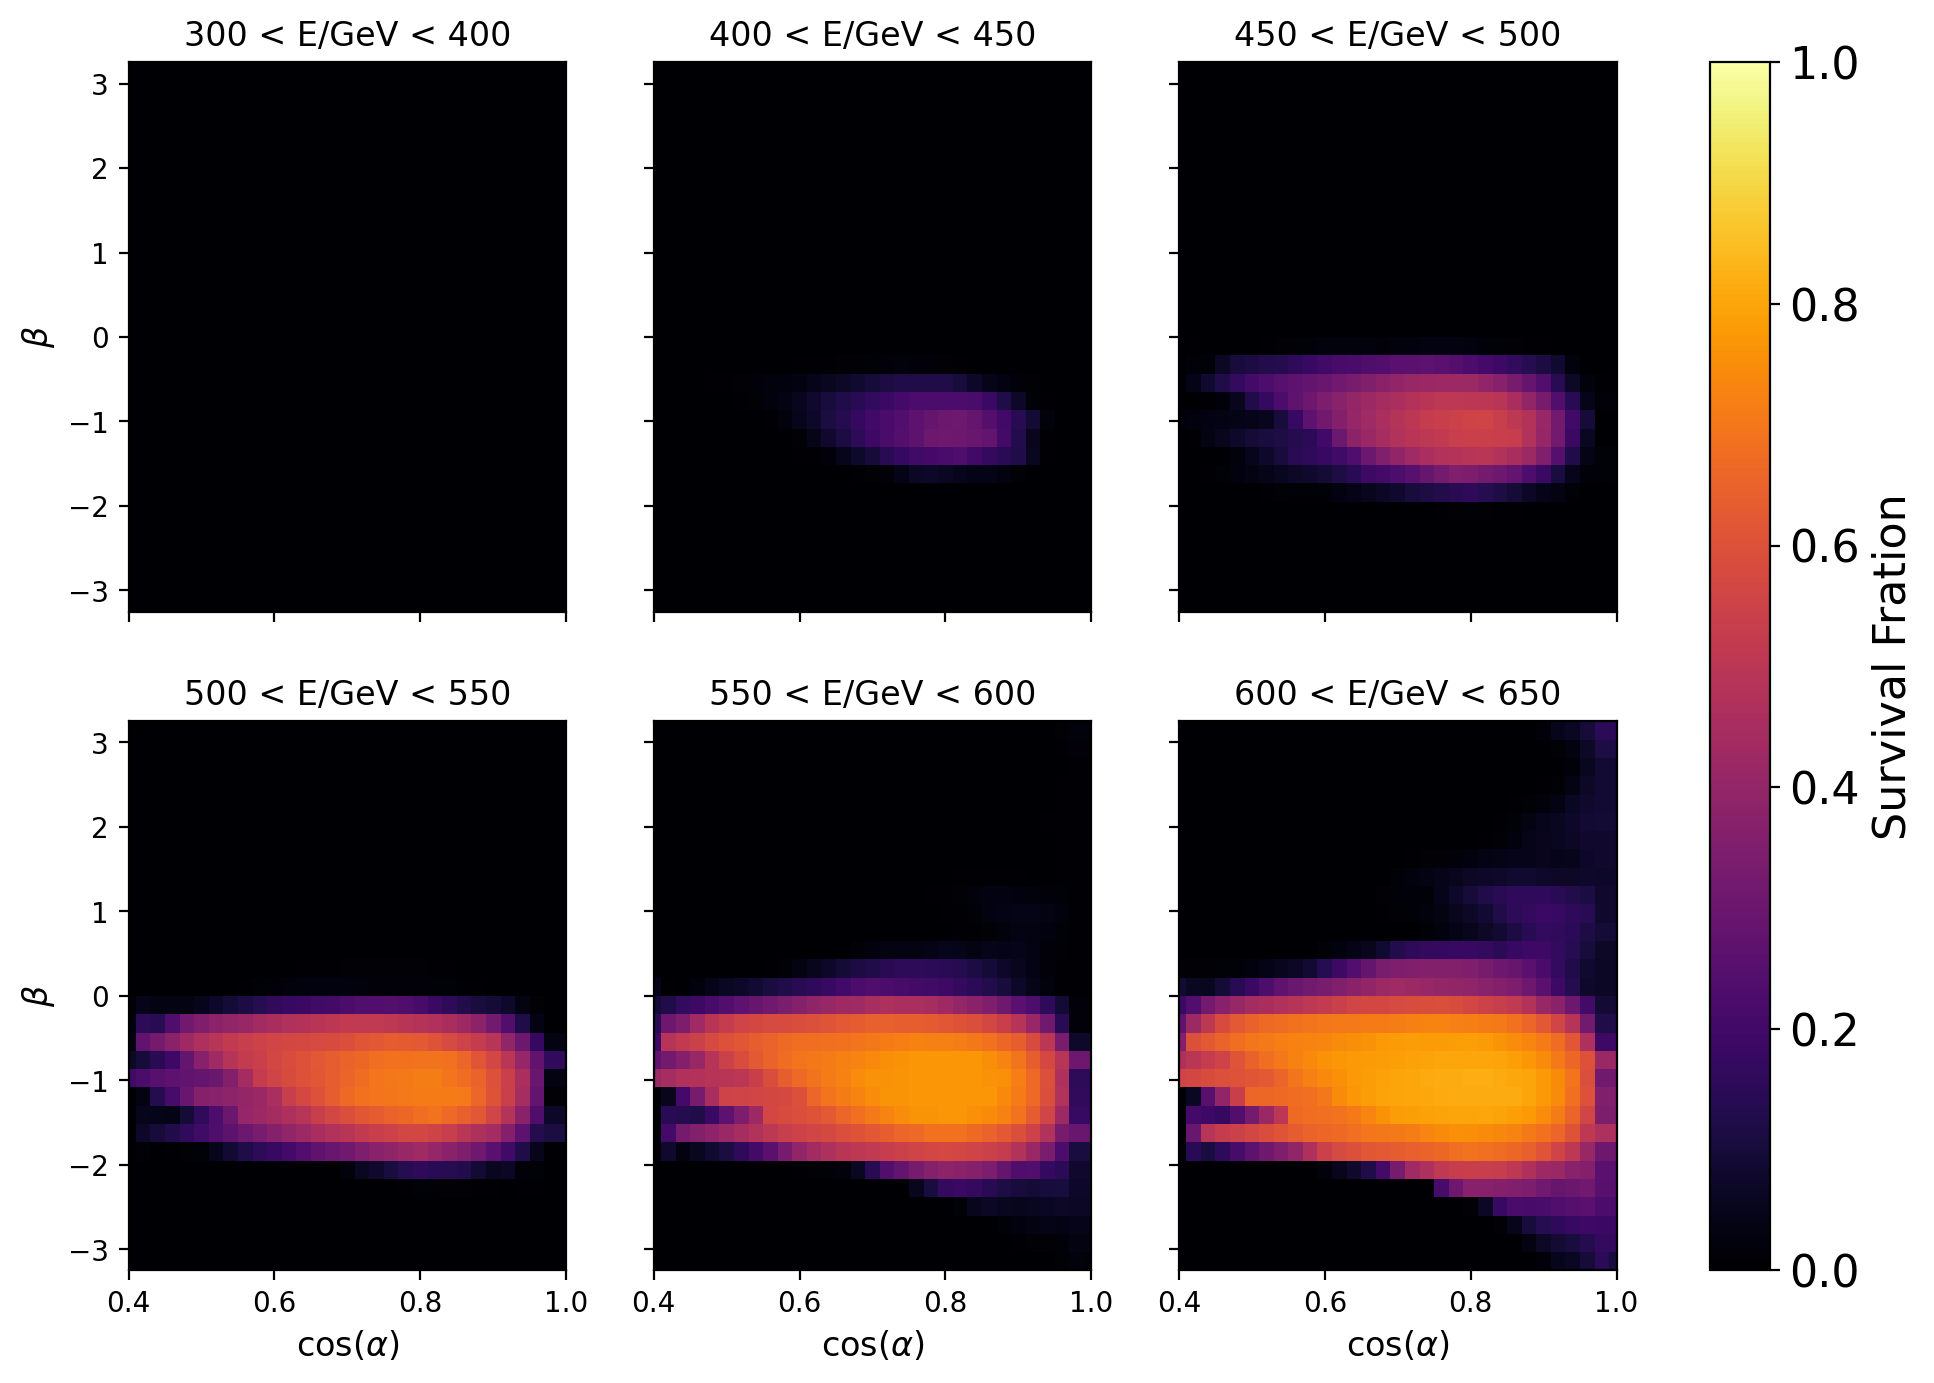

In [58]:
startn=1
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200, sharex=True, sharey=True)
for iax in range(0,len(axes.flat)):
    ax=axes.flatten()[iax]
    im=ax.pcolormesh(cosas,bs,np.transpose(survivalfractions[iax+startn]),cmap='inferno',shading='auto',vmin=0,vmax=1)
    ax.set_title(str(EBins[iax+startn])+ " < E/GeV < " + str(EBins[iax+startn+1]))
    ax.set_xlim(0.4,1)
cbar=fig.colorbar(im, ax=axes.ravel().tolist())
cbar.set_label('Survival Fration',fontsize=16)
cbar.ax.tick_params(labelsize=16)

axes[1,0].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,1].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,2].set_xlabel(r"cos($\alpha$)",fontsize=12)

axes[1,0].set_ylabel(r"$\beta$",fontsize=12)
axes[0,0].set_ylabel(r"$\beta$",fontsize=12)



Text(0, 0.5, '$\\beta$')

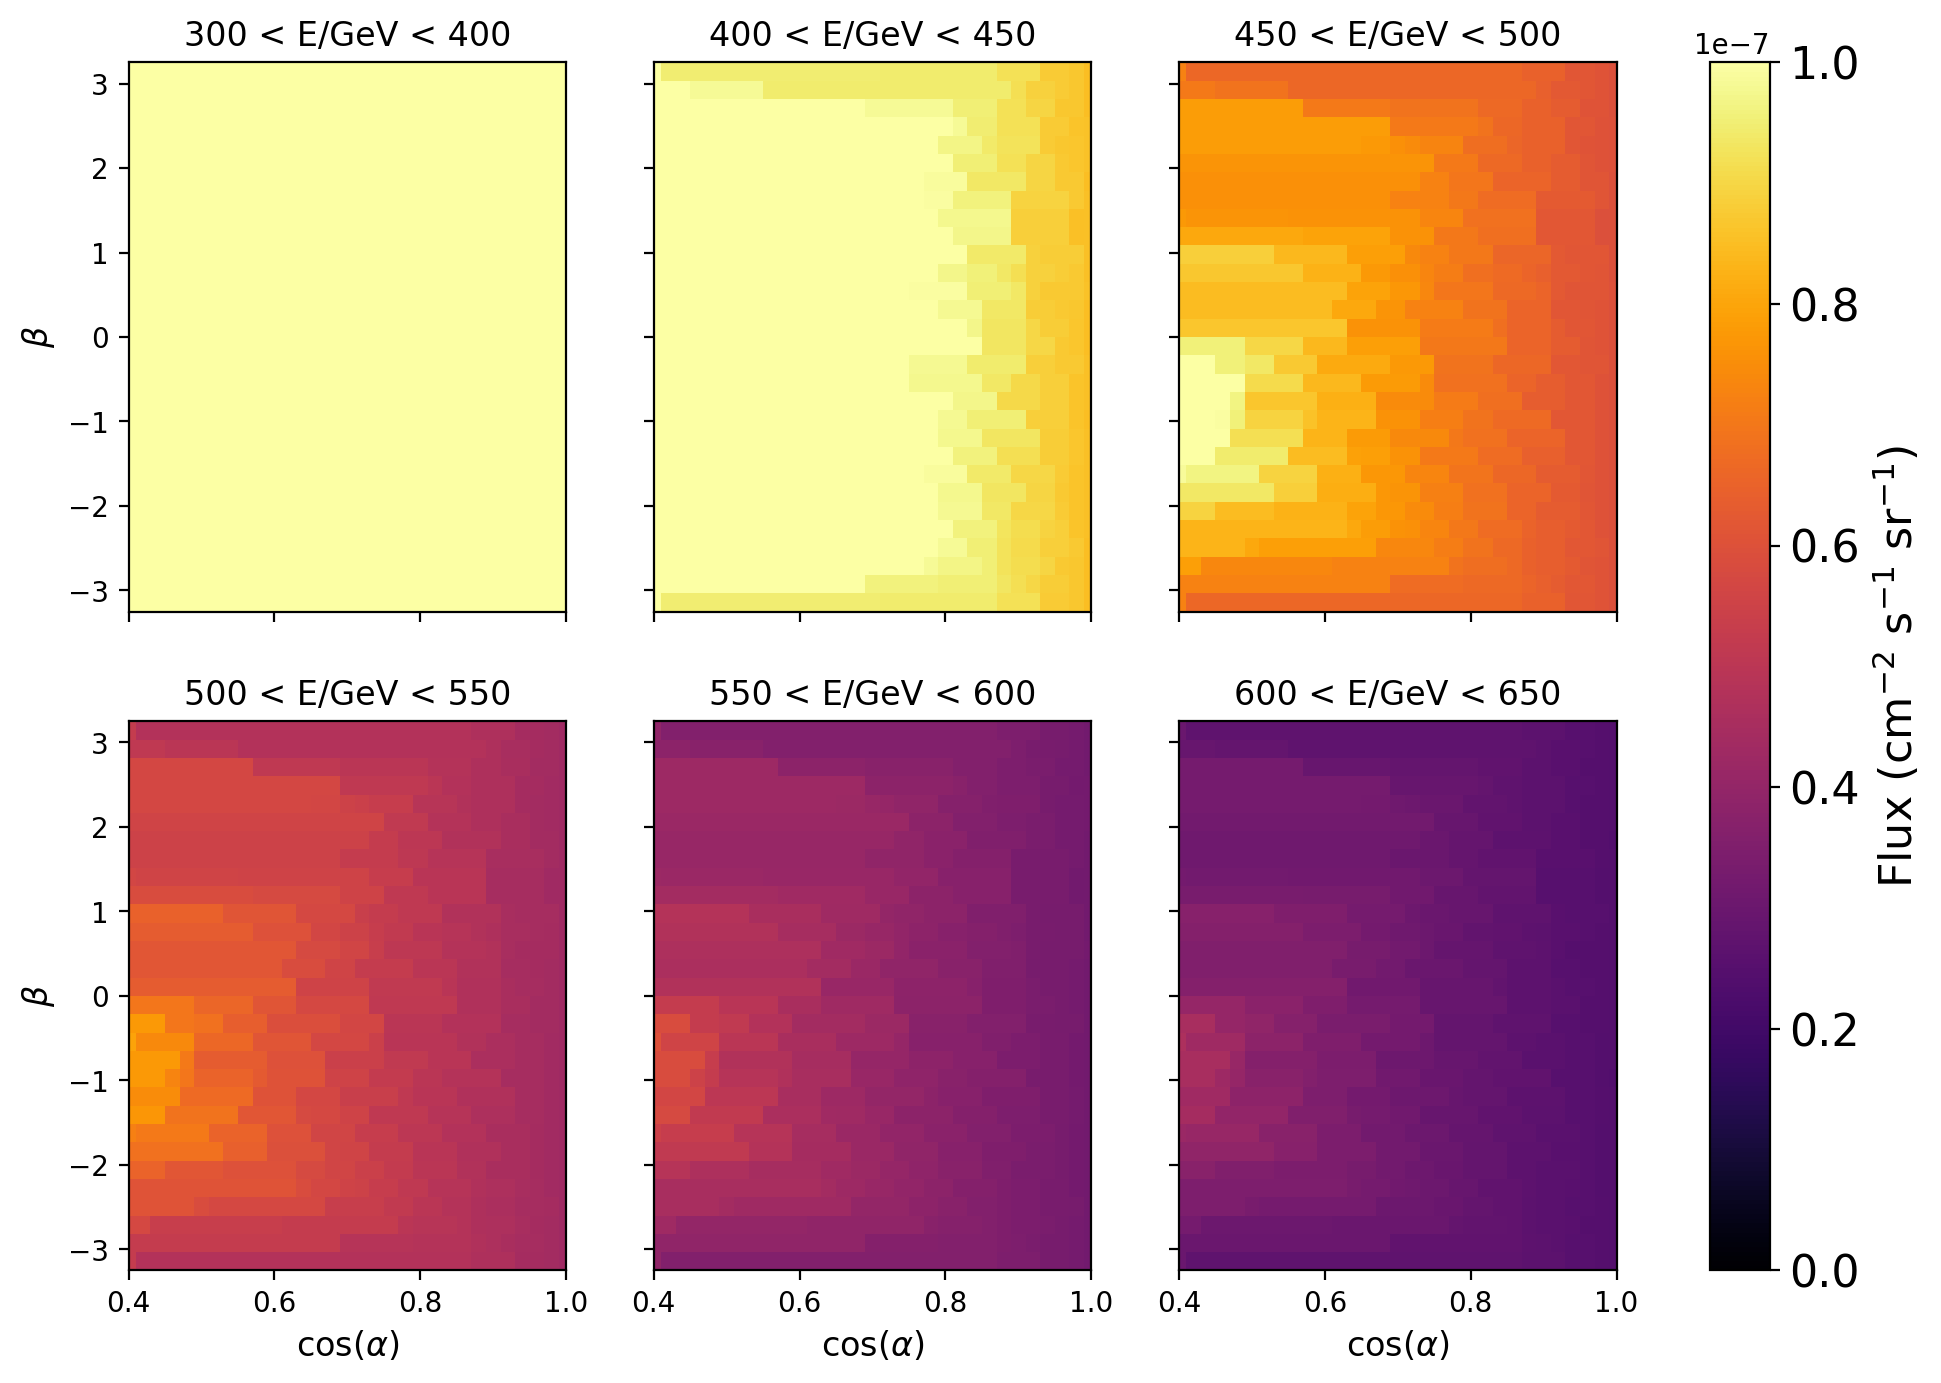

In [59]:
startn=1
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200, sharex=True, sharey=True)
for iax in range(0,len(axes.flat)):
    ax=axes.flatten()[iax]
    im=ax.pcolormesh(cosas,bs,np.transpose(FluxMeshes[iax+startn]),cmap='inferno',shading='auto',vmin=0,vmax=1e-7)
    ax.set_title(str(EBins[iax+startn])+ " < E/GeV < " + str(EBins[iax+startn+1]))
    ax.set_xlim(0.4,1)
cbar=fig.colorbar(im, ax=axes.ravel().tolist(),label='Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)
cbar.ax.tick_params(labelsize=16)

axes[1,0].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,1].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,2].set_xlabel(r"cos($\alpha$)",fontsize=12)

axes[1,0].set_ylabel(r"$\beta$",fontsize=12)
axes[0,0].set_ylabel(r"$\beta$",fontsize=12)



In [60]:
cosa_mesh, b_mesh=np.meshgrid(cosas,bs)

In [61]:
a_s=np.arccos(cosas-0.001)

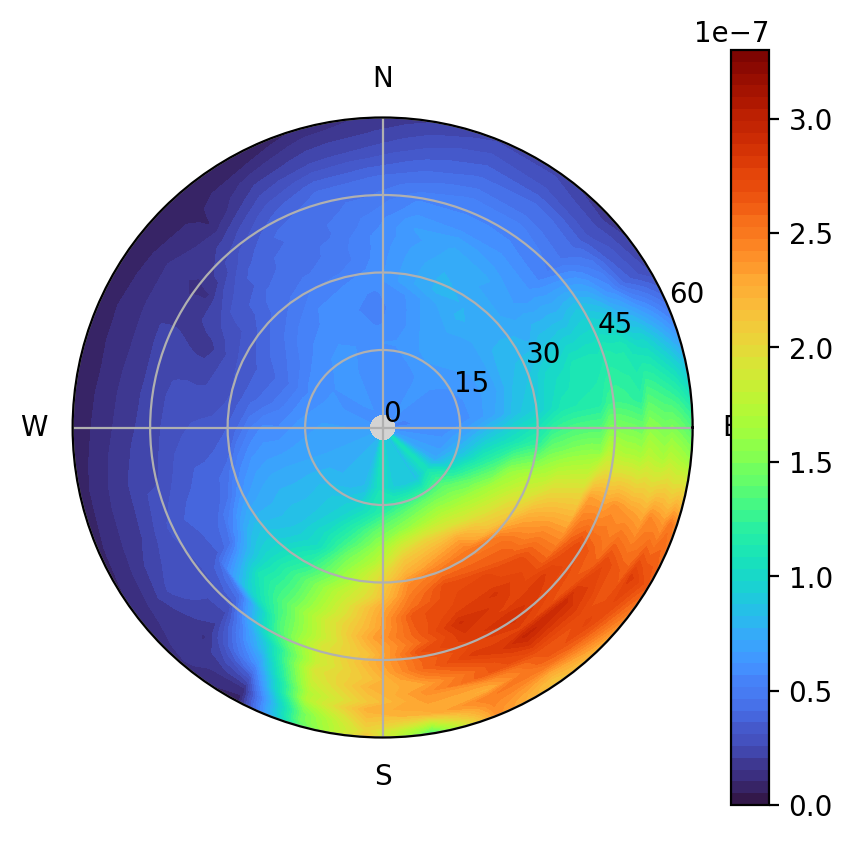

In [67]:
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),figsize=(5,5),dpi=200)
fig.patch.set_facecolor('white')
levels=np.linspace(0,3.3e-7,65)
im=ax.contourf(bs,np.arccos(cosas-0.001)*180/3.14, totalflux,cmap='turbo',levels=levels)
ax.set_rlim(0,60)
ax.set_rticks([0,15,30,45,60])
plt.savefig("Radars/"+str(ei).zfill(2)+".png",dpi=200)
plt.colorbar(im,ticks=np.arange(0,3.5e-7,5e-8))
ax.set_thetagrids([0,90,180,270],['E','N','W','S'])
ax.set(facecolor = "lightgrey",alpha=0.2)
plt.show()



In [63]:
totalflux

array([[6.97171009e-09, 5.91302610e-09, 5.41284171e-09, 4.55157411e-09,
        3.30628682e-09, 2.46314572e-09, 1.27827706e-08, 6.92949174e-09,
        5.59910658e-09, 3.53428789e-09, 2.36388963e-07, 2.00678808e-07,
        1.81153119e-07, 1.42716547e-07, 9.67353574e-08, 5.98893929e-08,
        3.15110650e-08, 2.39200111e-08, 2.34088997e-08, 2.26034264e-08,
        1.88682933e-08, 1.68590592e-08, 1.51779059e-08, 1.40614589e-08,
        1.31650345e-08, 1.23540988e-08, 1.11889102e-08, 1.00237215e-08,
        7.75768482e-09, 6.97171009e-09],
       [4.74299741e-09, 4.35855168e-09, 3.84630116e-09, 3.04417372e-09,
        3.24695217e-09, 3.34834469e-09, 6.20721511e-08, 1.13237929e-07,
        8.81865981e-08, 2.73770664e-08, 2.43844395e-07, 2.10560662e-07,
        2.41895175e-07, 2.03528827e-07, 1.33296492e-07, 7.56194576e-08,
        3.67953824e-08, 1.02428766e-08, 1.05239295e-08, 1.44130485e-08,
        1.55006270e-08, 1.35528376e-08, 1.23581963e-08, 1.13895426e-08,
        1.05995027e-08,

In [64]:
totalflux

array([[6.97171009e-09, 5.91302610e-09, 5.41284171e-09, 4.55157411e-09,
        3.30628682e-09, 2.46314572e-09, 1.27827706e-08, 6.92949174e-09,
        5.59910658e-09, 3.53428789e-09, 2.36388963e-07, 2.00678808e-07,
        1.81153119e-07, 1.42716547e-07, 9.67353574e-08, 5.98893929e-08,
        3.15110650e-08, 2.39200111e-08, 2.34088997e-08, 2.26034264e-08,
        1.88682933e-08, 1.68590592e-08, 1.51779059e-08, 1.40614589e-08,
        1.31650345e-08, 1.23540988e-08, 1.11889102e-08, 1.00237215e-08,
        7.75768482e-09, 6.97171009e-09],
       [4.74299741e-09, 4.35855168e-09, 3.84630116e-09, 3.04417372e-09,
        3.24695217e-09, 3.34834469e-09, 6.20721511e-08, 1.13237929e-07,
        8.81865981e-08, 2.73770664e-08, 2.43844395e-07, 2.10560662e-07,
        2.41895175e-07, 2.03528827e-07, 1.33296492e-07, 7.56194576e-08,
        3.67953824e-08, 1.02428766e-08, 1.05239295e-08, 1.44130485e-08,
        1.55006270e-08, 1.35528376e-08, 1.23581963e-08, 1.13895426e-08,
        1.05995027e-08,